In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/Mahendra/Downloads/htr research paper'):
    for i in range(1):
        for filename in filenames:
            print(os.path.join(dirname, filename))
            break


C:/Users/Mahendra/Downloads/htr research paper\22CBS10044_Handwritten_Character_Detection_using_AI_Techniques (AutoRecovered).docx
C:/Users/Mahendra/Downloads/htr research paper\DevanagariHandwrittenCharacterDataset\Test\character_10_yna\10544.png
C:/Users/Mahendra/Downloads/htr research paper\DevanagariHandwrittenCharacterDataset\Test\character_11_taamatar\10589.png
C:/Users/Mahendra/Downloads/htr research paper\DevanagariHandwrittenCharacterDataset\Test\character_12_thaa\10621.png
C:/Users/Mahendra/Downloads/htr research paper\DevanagariHandwrittenCharacterDataset\Test\character_13_daa\10674.png
C:/Users/Mahendra/Downloads/htr research paper\DevanagariHandwrittenCharacterDataset\Test\character_14_dhaa\10715.png
C:/Users/Mahendra/Downloads/htr research paper\DevanagariHandwrittenCharacterDataset\Test\character_15_adna\100360.png
C:/Users/Mahendra/Downloads/htr research paper\DevanagariHandwrittenCharacterDataset\Test\character_16_tabala\10800.png
C:/Users/Mahendra/Downloads/htr resear

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory as make_dataset
import matplotlib.pyplot as plt

train_dir="C:/Users/Mahendra/Downloads/htr research paper/DevanagariHandwrittenCharacterDataset/Train"
test_dir="C:/Users/Mahendra/Downloads/htr research paper/DevanagariHandwrittenCharacterDataset/Test"

img_height=32
img_width=32
batch_size=32

In [4]:
def count_images_in_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_class_counts = count_images_in_class(train_dir)
test_class_counts = count_images_in_class(test_dir)

combined_class_counts = {k: train_class_counts.get(k, 0) + test_class_counts.get(k, 0) for k in set(train_class_counts) | set(test_class_counts)}


print(combined_class_counts)

{'character_21_pa': 2000, 'character_12_thaa': 2000, 'character_3_ga': 2000, 'character_24_bha': 2000, 'character_9_jha': 2000, 'character_20_na': 2000, 'digit_0': 2000, 'character_7_chha': 2000, 'digit_9': 2000, 'character_27_ra': 2000, 'character_28_la': 2000, 'digit_6': 2000, 'character_17_tha': 2000, 'character_35_tra': 2000, 'digit_8': 2000, 'character_33_ha': 2000, 'character_6_cha': 2000, 'digit_2': 2000, 'character_15_adna': 2000, 'character_31_petchiryakha': 2000, 'character_11_taamatar': 2000, 'character_19_dha': 2000, 'character_23_ba': 2000, 'character_29_waw': 2000, 'character_34_chhya': 2000, 'character_1_ka': 2000, 'digit_4': 2000, 'digit_1': 2000, 'character_8_ja': 2000, 'character_32_patalosaw': 2000, 'character_30_motosaw': 2000, 'digit_5': 2000, 'character_36_gya': 2000, 'character_10_yna': 2000, 'character_13_daa': 2000, 'character_26_yaw': 2000, 'character_22_pha': 2000, 'character_18_da': 2000, 'character_14_dhaa': 2000, 'character_4_gha': 2000, 'digit_3': 2000, '

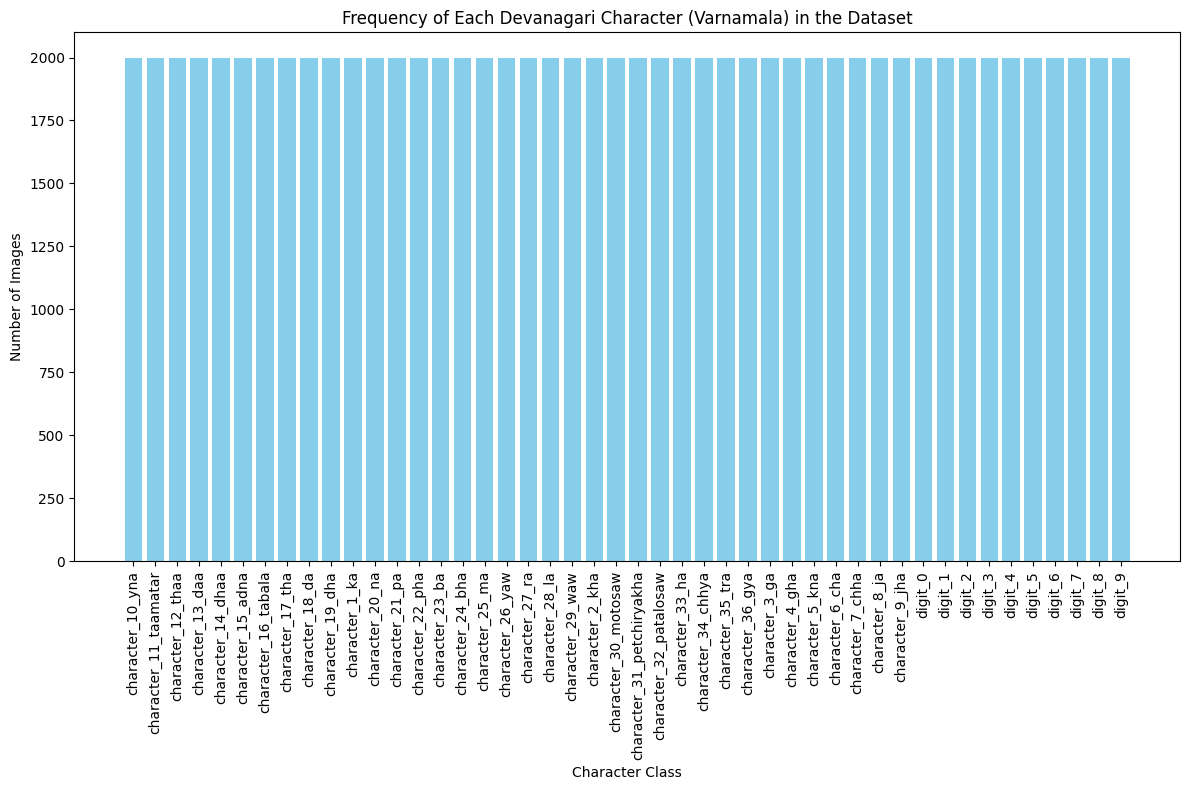

In [5]:
sorted_counts = dict(sorted(combined_class_counts.items()))

plt.figure(figsize=(12, 8))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')

plt.xlabel('Character Class')
plt.ylabel('Number of Images')
plt.title('Frequency of Each Devanagari Character (Varnamala) in the Dataset')
plt.xticks(rotation=90)  # Rotate x labels for readability

plt.tight_layout()
plt.show()


In [6]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 78200 files belonging to 46 classes.
Using 62560 files for training.
Found 78200 files belonging to 46 classes.
Using 15640 files for validation.
Found 13800 files belonging to 46 classes.


In [7]:
class_names=train_ds.class_names
print(class_names)


['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


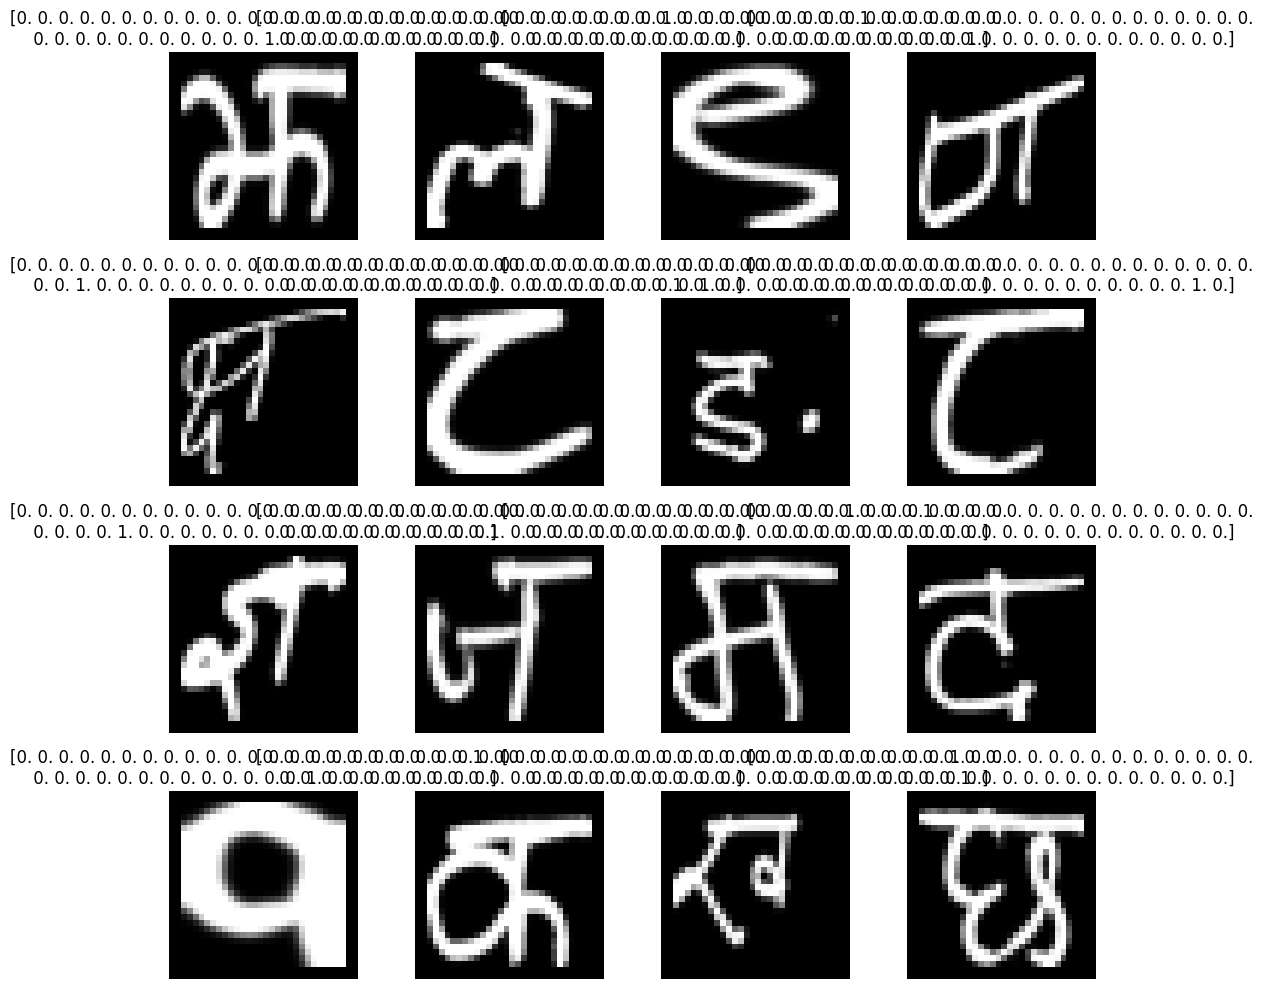

In [8]:
for images, labels in train_ds.take(1):  
    plt.figure(figsize=(10, 10))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"{labels[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    break  
    

In [9]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax') 
])


In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(train_ds, validation_data=val_ds, epochs=30)


Epoch 1/30
1955/1955 [==============================] - 213s 108ms/step - loss: 0.0976 - accuracy: 0.9840 - val_loss: 1.1682 - val_accuracy: 0.9253
Epoch 3/30
1955/1955 [==============================] - 149s 76ms/step - loss: 0.1029 - accuracy: 0.9856 - val_loss: 1.1377 - val_accuracy: 0.9208
Epoch 4/30
1955/1955 [==============================] - 131s 67ms/step - loss: 0.0947 - accuracy: 0.9857 - val_loss: 1.2658 - val_accuracy: 0.9242
Epoch 5/30
1955/1955 [==============================] - 149s 76ms/step - loss: 0.0895 - accuracy: 0.9869 - val_loss: 1.2937 - val_accuracy: 0.9253
Epoch 6/30
1955/1955 [==============================] - 149s 76ms/step - loss: 0.0801 - accuracy: 0.9885 - val_loss: 1.5664 - val_accuracy: 0.9185
Epoch 9/30
1955/1955 [==============================] - 125s 64ms/step - loss: 0.0825 - accuracy: 0.9892 - val_loss: 1.4474 - val_accuracy: 0.9227
Epoch 10/30
1955/1955 [==============================] - 153s 78ms/step - loss: 0.0850 - accuracy: 0.9887 - val_loss:

In [13]:
model.evaluate(test_ds)

432/432 [==============================] - 53s 117ms/step - loss: 2.0005 - accuracy: 0.9341


[2.0004770755767822, 0.9340579509735107]

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),  # Ensure the size matches your model's input
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # We don't shuffle so predictions can align with true labels
)

# Get the class labels (mapping from indices to character classes)
class_labels = list(test_generator.class_indices.keys())
print("Class labels:", class_labels)


Found 13800 images belonging to 46 classes.
Class labels: ['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [15]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# True labels (ground truth)
true_classes = test_generator.classes

432/432 [==============================] - 10s 21ms/step


In [16]:
from sklearn.metrics import accuracy_score
from collections import defaultdict

# Initialize a dictionary to keep track of correct predictions and total samples per class
class_correct = defaultdict(int)
class_total = defaultdict(int)

# Compare predicted labels with true labels
for true_label, predicted_label in zip(true_classes, predicted_classes):
    class_total[true_label] += 1  # Increment the total count for this class
    if true_label == predicted_label:
        class_correct[true_label] += 1  # Increment the correct count for this class

# Calculate and display accuracy per class
for class_idx in range(len(class_labels)):
    if class_total[class_idx] > 0:  # Avoid division by zero
        accuracy = class_correct[class_idx] / class_total[class_idx]
        print(f"Accuracy for character {class_labels[class_idx]}: {accuracy * 100:.2f}%")
    else:
        print(f"No samples found for character {class_labels[class_idx]}")

Accuracy for character character_10_yna: 0.00%
Accuracy for character character_11_taamatar: 0.00%
Accuracy for character character_12_thaa: 0.00%
Accuracy for character character_13_daa: 0.00%
Accuracy for character character_14_dhaa: 0.00%
Accuracy for character character_15_adna: 0.00%
Accuracy for character character_16_tabala: 0.00%
Accuracy for character character_17_tha: 0.00%
Accuracy for character character_18_da: 0.33%
Accuracy for character character_19_dha: 0.00%
Accuracy for character character_1_ka: 0.00%
Accuracy for character character_20_na: 0.00%
Accuracy for character character_21_pa: 0.00%
Accuracy for character character_22_pha: 0.00%
Accuracy for character character_23_ba: 0.33%
Accuracy for character character_24_bha: 0.00%
Accuracy for character character_25_ma: 0.00%
Accuracy for character character_26_yaw: 0.00%
Accuracy for character character_27_ra: 0.00%
Accuracy for character character_28_la: 0.00%
Accuracy for character character_29_waw: 0.00%
Accuracy fo

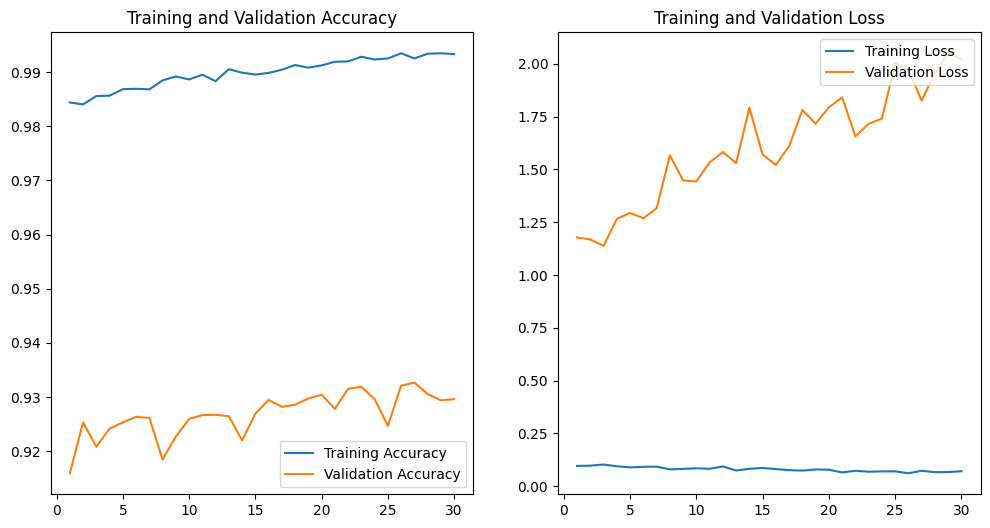

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Display the plots
plt.show()